# TP1_TIM Fait par :
- Nacerdine Dounia Amira
- Chebouti Boutheina

# *Importation des packages*

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cmath
import os

# ***Manipulation 1***

1- Création des matrices: I1, I2, et I3, et conversion des trois matrices en uint8:

In [ ]:
#création des matrices I1, I2, I3:
A=np.array([4*i for i in range(64)])
I1=-np.array([A for i in range(64)])
B=[0 ,0, 0, 0, 0, 0, 0 ,0] 
C=[0 ,0 ,1 ,1 ,1 ,1, 0 ,0]
I2= np.array([B,B,C,C,C,C,B,B])
I33 = np.concatenate((I2,I2), axis = 1)
I3= np.concatenate((I33,I33), axis = 0)
#conversion des trois matrices:
I1=np.uint8(I1)
I2=np.uint8(I2)
I3=np.uint8(I3)



In [ ]:
#autre methode pour trouver I3:
I_3 = np.tile(I2,(2,2))

- affichage des matrices avec la fonction plt.imshow():

la matrice I1


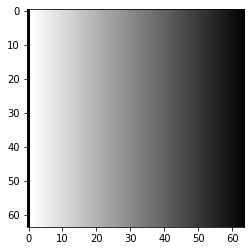

la matrice I2


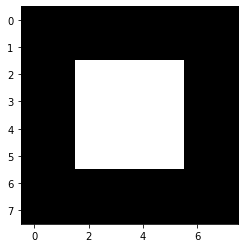

la matrice I3


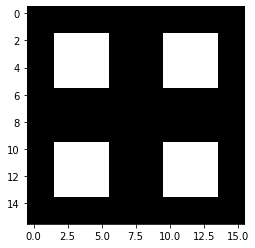

In [ ]:
print("la matrice I1")
plt.imshow(I1, cmap = 'gray')
plt.show()
print("la matrice I2")
plt.imshow(I2, cmap = 'gray')
plt.show()
print("la matrice I3")
plt.imshow(I3, cmap = 'gray')
plt.show()

- affichage des matrices avec la fonction cv.imshow()

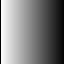

In [ ]:
#affichage de I1:
#il y a un certain probleme sur colab lors de l'utilisation directe de cv.imshow, c'est pour cela que j'ai importé cv2_imshow frome google.colab.patches
from google.colab.patches import cv2_imshow
cv2_imshow(I1)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#affichage de I2:
cv2_imshow(I2)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#affichage de I3:
cv2_imshow(I3)
cv.waitKey(0)
cv.destroyAllWindows()

**commentaires** : on voit bien une différence de taille entre les images des trois matrices I1, I2, I3, affichées par les deux fonctions plt.imshow() et cv.imshow(). on voit que les images affichées par la méthode cv.imshow() sont petites (avec des dimensions différentes), et les images affichées par la méthode plt.show() apparaissent dans la même taille.     
Cette différence s'explique par le fait que la fonction plt.imshow() affiche des images avec un nombre de pixels qui ne correspond généralement pas à la taille de l'image d'origine(ce qui peut condruire dans certains cas á des artefacts), contrairement à la fonction cv.imshow() qui est une méthode qui s'utilise pour afficher une image dans une fenêtre, cette fenêtre s'adapte automatiquement à la taille d'origine de l'image.         
 Cela explique le petit format des images affichées, c'est parce qu'elles ont reellement des petites tailles.

In [ ]:
# les sizes des 3 images I1, I2, I3
print(I1.shape)
print(I2.shape)
print(I3.shape)
# la difference de dimension se voit bien dans les images affichées par la methode cv.imshow()

(64, 64)
(8, 8)
(16, 16)


- un plus: autre méthode d'affichage des matrices:

In [ ]:
#affichage de I1,2,3:
fig, axe=plt.subplots(nrows=3,ncols=1, )
plt.figure(figsize=(70,6))
axe[0].imshow(I1, cmap = 'gray') #ndir axe[0,1] ki ykon 3andi plusieurs lignes et plusieurs columns 
axe[0].set_title('matrice I1')
axe[1].imshow(I2, cmap = 'gray')
axe[2].set_title('matrice I2')
axe[2].imshow(I3, cmap = 'gray')
axe[2].set_title('matrice I3')



# **Manipulation 2**

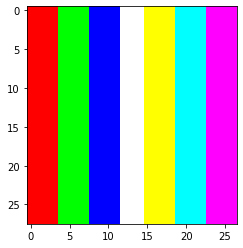

In [ ]:
# construction des matrices R, G, B
# la matrice du plan R
RL1=np.array([255,255,255,255,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,255,255,255,255])
R=np.tile(RL1,(28,1))
# la matrice du plan G
GL1=np.array([0,0,0,0,255,255,255,255,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0])
G=np.tile(GL1,(28,1))
# la matrice du plan B
BL1=np.array([0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,255,255,255,255,255,255,255,255])
B=np.tile(BL1,(28,1))
# la concatenation des 3 plan avec la methode merge ()et l'affichage de l'image en couleur
image=cv.merge(np.uint8([R,G,B])) #la matrice est codée sur 8bit au lieu de 64
plt.imshow(image) 
plt.show()

- l’image obtenue est codée sur "28 * 8 * 3 = 672bits", les plans R, G, B 
respectivement sont codés sur 28 * 8, chaque pixel est codé sur 3 * 8= 24bits

- Calcul du poids théorique de l'image:

In [ ]:
poid_theorique=(28*28*3*8)/8 
print("le poid theorique de l'image est: " + str(poid_theorique)+ " octets")
print("le poid theorique de l'image en Ko est: " + str(poid_theorique/1000)+ " ko")
# 

le poid theorique de l'image est: 2352.0 octets
le poid theorique de l'image en Ko est: 2.352 ko


- Enregistrement de l’image obtenue sous format .bmp

In [ ]:
# Enregistrement de l’image obtenue sous format .bmp
cv.imwrite('nom.bmp',image) # enregistrer l'image sous format bmp

True

- le poids enregistré sur l'espace de stockage est de 2,4 ko qui est presque egale au poids theorique (legerement superieur).

In [ ]:
# un plus: enregistrer l'image sous format jpg
cv.imwrite('imagejpg.jpg', image) 

# ***Manipulation 3***

- Lire et visualizer l’image « mandrill.png » à l’aide des fonctions cv.imread et plt.imshow

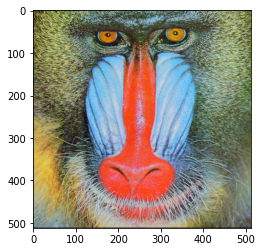

In [ ]:
img = cv.imread('/content/mandrill.png')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)


- Afficher la taille et la profondeur de l’image avec les fonctions img.shape et img.dtype.

In [ ]:
#la taille de l'image
print("la taille de l'image est: ", img.shape)

la taille de l'image est:  (512, 512, 3)


In [ ]:
# la profondeur de l'image
print("la profondeur de l'image est: ", img.dtype)


la profondeur de l'image est:  uint8


- les valeurs de l’image sont de type « uint8 » car chaque pixel est codé sur 8 * 3 bits, c'est a dire que il est codé sur 8 bits dans chaque plans des 3 plans RGB

- Séparer les canaux RGB et visualiser chaque canal indépendamment à l’aide de l’instruction cv.split:

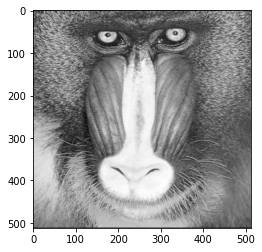

In [ ]:
# separation des 3 canaux RGB
r,g,b = cv.split(img)
# Visualisation du canal R
plt.imshow(r, cmap='gray')
plt.show()

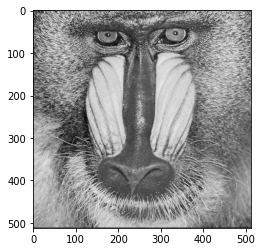

In [ ]:
# Visualisation du canal G
plt.imshow(g, cmap='gray')
plt.show()

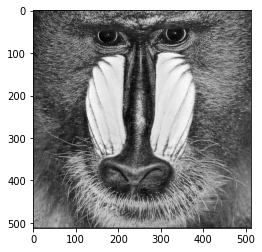

In [ ]:
# Visualisation du canal B
plt.imshow(b, cmap='gray')
plt.show()

- Expliquer comment apparaissent les yeux du mandrill sur les 3 composantes RGB: 

-  sur la composante R: les yeux apparaisent en gris trés clair  
-  sur la composante G: les yeux apparaisent en gris moins clair que celui de la composante R.
-  sur la composante B: les yeux apparaisent en gris trés foncé proche du noir.

On voit bien que la couleur des yeux du mandrill est orange miel, et cette couleur est obtenue par le mélange de la composante rouge et la composante vert avec une intensité du rouge plus elevée que celle du vert, et une intensité trés faible de la composante B.



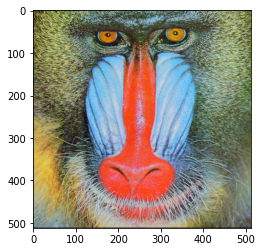

In [ ]:
#plus: merging the r,g,b images
imagemerged=cv.merge([r, g, b])
plt.imshow(imagemerged)
plt.show()

- Intervertir l’ordre des canaux RGB en faisant toutes les combinaisons possibles.
- On a 3! cas possibles, cad 6 images possibles

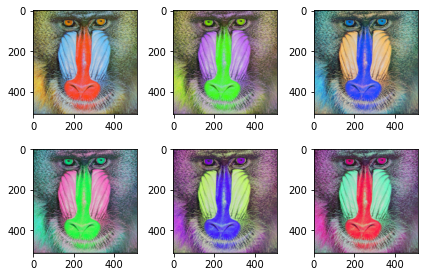

In [ ]:
#visualisation des 6 images 
figure, ax = plt.subplots(2,3)

image1=cv.merge([r, g, b])
ax[0,0].imshow(image1)

image2=cv.merge([g, r, b])
ax[0,1].imshow(image2)

image3=cv.merge([b, g, r])
ax[0,2].imshow(image3)

image4=cv.merge([b, r, g])
ax[1,0].imshow(image4)

image5=cv.merge([g, b, r])
ax[1,1].imshow(image5)

image6=cv.merge([r, b, g])
ax[1,2].imshow(image6)
plt.tight_layout()
plt.show()

***commentaires***: on voit que chaque combinaison des 3 canaux de couleurs genere une image differente des autres images, on explique cela par le fait que chaque canal des 3 canaux RGB recoit de differents codage a chaque fois qu'on change l'ordre des matrices, cad que chaque canal obtient a chaque iteration de nouvelles repartition de niveau , ce qui change la couleur resultante de la fonction merge().

- Stocker la composante R de l’image dans un fichier .png, la composante G dans un fichier
.bmp et la composante B dans un fichier .jpeg en utilisant l’instruction cv.imwrite

In [ ]:
# stockage de la composante R
cv.imwrite('imagejpg.png', r)
# stockage de la composante G
cv.imwrite('imagejpg.bmp', g)
# stockage de la composante B
cv.imwrite('imagejpg.jpeg', b)

True

- Calculer le poids théorique de chaque composante (R, G, B) et comparer avec le poids des
fichiers obtenus à la question précédente.

In [ ]:
#poids theorique de la composante R
poidtheorique_R=512*512
print("le poids theorique de la composante R est",poidtheorique_R, "octets" )
#poids theorique de la composante G
poidtheorique_G=512*512
print("le poids theorique de la composante G est",poidtheorique_G, "octets" )
#poids theorique de la composante B
poidtheorique_B=512*512
print("le poids theorique de la composante B est",poidtheorique_B, "octets" )

le poids theorique de la composante R est 262144 octets
le poids theorique de la composante G est 262144 octets
le poids theorique de la composante B est 262144 octets


***commentaires:*** le poids dans l'espace de stockage de la composante B.bmp est : 263222 Octets. et celui de la composante G.jpeg est : 162971 Octets. et celui de la composante R.png est : 209013 Octets.               
On remarque que le poids de l'image sous format bmp est quasiment egale au poids theorique ( legerement superieur).                                   
le poids de limage sous format jpeg et le poids de l'image png sont inferieur au poids theorique, avec le poids de l'image png qui est superieur au poids de l'image jpeg.                                        
On explique cela par le fait que lorsque on enregistre l'image sous format bmp, elle ne subit aucune compression, et reste codée sur 8 bit. Contrairement aux deuc formats png et jpeg qui compresse l'image et elle ne sera plus codée sur 8bits( moins de 8bits) 

- Réaliser un passage en niveau de gris

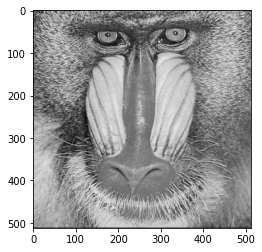

In [ ]:
# la formule du passage vers le niveau de gris
luminance = 0.2126*r+0.7152*g+0.0722*b
# visualisation
plt.imshow(luminance, cmap = 'gray')

- passage en niveau de gris en utilisant la methode cvtColor()

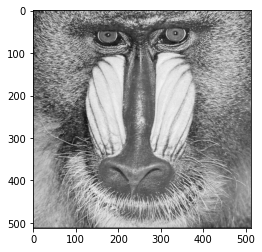

In [ ]:
img =cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

***commentaires:*** On n'obtient pas le meme résultat que précedement.
l'image obtenue avec la fonction cv.cvtColor() a plus de contraste, on explique cette diffrenece par la possibilité que la fonction cv.cvtColor() utilise d'autres coefficients que ceux utilisés dans la fonction de la luminamce.

# *conclusion*

A la fin de ce TP,   j'ai pu comprendre au mieux les notions theoriques abordées dans le cours, grace aux differentes manipulations.               
Ce TP m'a permis de me familiariser avec les librairies OpenCV ( qui est une librairie largement utilisée dans les problemes de Computer Vision), mais aussi de m'exercer encore plus avec les packages numpy et matplotlib. 
J'ai appris comment convertir une matrice a une image, comment importer et lire une image d'aprés un repertoire interne, comment construire et separer une image en niveau RGB, comment passer d'une image couleur a une image niveau de gris, et je fais maintenant la difference entre image.png, image.jpeg, et image.bmp.                                                  
C'est le TP le plus amusant que j'ai fait depuis des années.